<a href="https://colab.research.google.com/github/andraroman12/PMP-2024/blob/main/Lab11/ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


Saving real_estate_data.csv to real_estate_data (1).csv


Output()

Output()

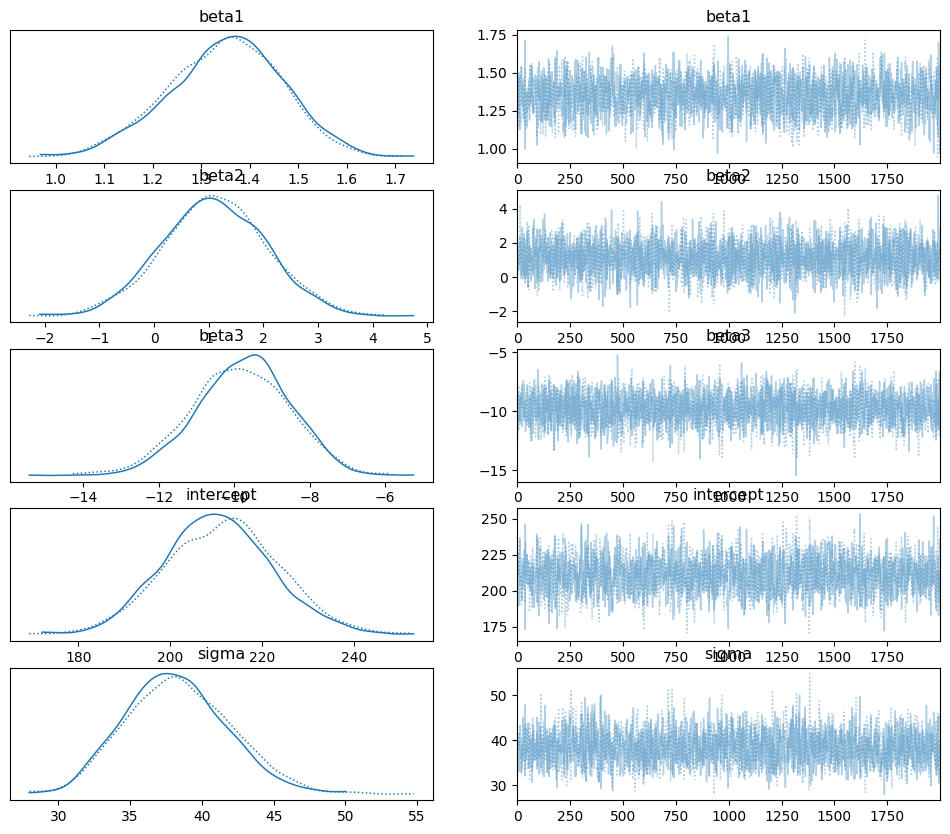

              mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta1        1.350   0.116    1.119    1.557      0.003    0.002    2048.0   
beta2        1.105   0.951   -0.679    2.927      0.018    0.014    2894.0   
beta3       -9.813   1.270  -12.215   -7.535      0.024    0.017    2911.0   
intercept  210.849  12.099  187.986  233.388      0.277    0.196    1902.0   
sigma       38.274   3.604   31.803   44.995      0.078    0.055    2151.0   

           ess_tail  r_hat  
beta1        2416.0    1.0  
beta2        2038.0    1.0  
beta3        2104.0    1.0  
intercept    2259.0    1.0  
sigma        2681.0    1.0  


In [13]:
# Asigura-te că instalezi pachetele necesare înainte de rulare:
# !pip install pymc arviz matplotlib pandas

import pandas as pd
import pymc as pm
import arviz as az
from matplotlib import pyplot as plt

# Încarcă fișierul .csv în Google Colab
from google.colab import files
uploaded = files.upload()

# Citirea fișierului încărcat
allData = pd.read_csv("real_estate_data.csv")
distance = pd.to_numeric(allData['Distance_to_center'], errors='coerce')
rooms = pd.to_numeric(allData['Rooms'], errors='coerce')
surface = pd.to_numeric(allData['Surface_area'], errors='coerce')
price = pd.to_numeric(allData['Price'], errors='coerce')

# Definirea variabilelor
x1 = surface
x2 = rooms
x3 = distance
y = price

# Construirea modelului în PyMC
with pm.Model() as model:
    intercept = pm.Normal("intercept", mu=y.mean(), sigma=10)
    beta1 = pm.Normal("beta1", mu=x1.mean(), sigma=10)
    beta2 = pm.Normal("beta2", mu=x2.mean(), sigma=1)
    beta3 = pm.Normal("beta3", mu=x3.mean(), sigma=10)
    eps = pm.HalfNormal("sigma", sigma=10)

    mu = intercept + beta1 * x1 + beta2 * x2 + beta3 * x3

    y_obs = pm.Normal("y_obs", mu=mu, sigma=eps, observed=y)

    # Eșantionare
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Vizualizarea distribuțiilor a posteriori
az.plot_trace(trace)
plt.show()

# Rezumatul rezultatelor
summary = az.summary(trace)
print(summary)
